In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
layers = 4
neurons = [32, 32, 16, 1]

In [6]:
import time

In [7]:
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 200,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": True,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [8]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]

Epoch 1. Training MSE: 1.042, Test MSE: 1.029.
Epoch 2. Training MSE: 0.76, Test MSE: 0.741.
Epoch 3. Training MSE: 0.752, Test MSE: 0.746.
Epoch 4. Training MSE: 0.703, Test MSE: 0.714.
Epoch 5. Training MSE: 0.719, Test MSE: 0.732.
Epoch 6. Training MSE: 0.732, Test MSE: 0.757.
Epoch 7. Training MSE: 0.687, Test MSE: 0.693.
Epoch 8. Training MSE: 0.721, Test MSE: 0.731.
Epoch 9. Training MSE: 0.673, Test MSE: 0.686.
Epoch 10. Training MSE: 0.676, Test MSE: 0.675.
Epoch 11. Training MSE: 0.692, Test MSE: 0.7.
Epoch 12. Training MSE: 0.664, Test MSE: 0.673.
Epoch 13. Training MSE: 0.667, Test MSE: 0.679.
Epoch 14. Training MSE: 0.648, Test MSE: 0.658.
Epoch 15. Training MSE: 0.673, Test MSE: 0.686.
Epoch 16. Training MSE: 0.673, Test MSE: 0.674.
Epoch 17. Training MSE: 0.675, Test MSE: 0.69.
Epoch 18. Training MSE: 0.711, Test MSE: 0.751.
Epoch 19. Training MSE: 0.684, Test MSE: 0.717.
Epoch 20. Training MSE: 0.645, Test MSE: 0.657.
Calculation time for 100 particles: 15.03720490137736

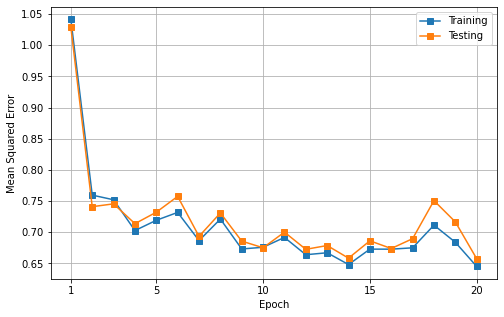

Epoch 1. Training MSE: 1.43, Test MSE: 1.429.
Epoch 2. Training MSE: 0.876, Test MSE: 0.872.
Epoch 3. Training MSE: 0.791, Test MSE: 0.796.
Epoch 4. Training MSE: 0.707, Test MSE: 0.72.
Epoch 5. Training MSE: 0.638, Test MSE: 0.657.
Epoch 6. Training MSE: 0.641, Test MSE: 0.669.
Epoch 7. Training MSE: 0.603, Test MSE: 0.635.
Epoch 8. Training MSE: 0.688, Test MSE: 0.706.
Epoch 9. Training MSE: 0.827, Test MSE: 0.836.
Epoch 10. Training MSE: 0.699, Test MSE: 0.709.
Epoch 11. Training MSE: 0.656, Test MSE: 0.672.
Epoch 12. Training MSE: 0.645, Test MSE: 0.64.
Epoch 13. Training MSE: 0.77, Test MSE: 0.752.
Epoch 14. Training MSE: 0.812, Test MSE: 0.801.
Epoch 15. Training MSE: 0.707, Test MSE: 0.704.
Epoch 16. Training MSE: 0.701, Test MSE: 0.701.
Epoch 17. Training MSE: 0.719, Test MSE: 0.708.
Epoch 18. Training MSE: 0.777, Test MSE: 0.749.
Epoch 19. Training MSE: 0.862, Test MSE: 0.838.
Epoch 20. Training MSE: 0.768, Test MSE: 0.739.
Calculation time for 200 particles: 30.87649706999461

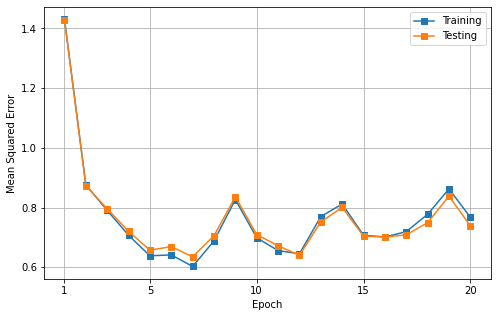

Epoch 1. Training MSE: 1.467, Test MSE: 1.469.
Epoch 2. Training MSE: 1.024, Test MSE: 1.025.
Epoch 3. Training MSE: 0.772, Test MSE: 0.78.
Epoch 4. Training MSE: 0.726, Test MSE: 0.738.
Epoch 5. Training MSE: 0.692, Test MSE: 0.697.
Epoch 6. Training MSE: 0.63, Test MSE: 0.645.
Epoch 7. Training MSE: 0.629, Test MSE: 0.644.
Epoch 8. Training MSE: 0.627, Test MSE: 0.642.
Epoch 9. Training MSE: 0.678, Test MSE: 0.7.
Epoch 10. Training MSE: 0.827, Test MSE: 0.863.
Epoch 11. Training MSE: 0.746, Test MSE: 0.769.
Epoch 12. Training MSE: 0.803, Test MSE: 0.822.
Epoch 13. Training MSE: 0.763, Test MSE: 0.778.
Epoch 14. Training MSE: 0.711, Test MSE: 0.721.
Epoch 15. Training MSE: 0.725, Test MSE: 0.742.
Epoch 16. Training MSE: 0.763, Test MSE: 0.791.
Epoch 17. Training MSE: 0.669, Test MSE: 0.696.
Epoch 18. Training MSE: 0.692, Test MSE: 0.71.
Epoch 19. Training MSE: 0.874, Test MSE: 0.892.
Epoch 20. Training MSE: 0.773, Test MSE: 0.796.
Calculation time for 300 particles: 44.756446127096815

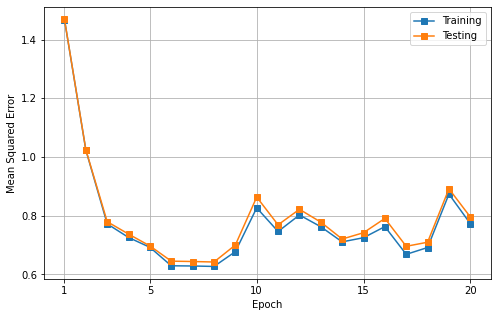

Epoch 1. Training MSE: 1.378, Test MSE: 1.38.
Epoch 2. Training MSE: 0.826, Test MSE: 0.826.
Epoch 3. Training MSE: 0.754, Test MSE: 0.752.
Epoch 4. Training MSE: 0.724, Test MSE: 0.725.
Epoch 5. Training MSE: 0.659, Test MSE: 0.669.
Epoch 6. Training MSE: 0.6, Test MSE: 0.62.
Epoch 7. Training MSE: 0.613, Test MSE: 0.644.
Epoch 8. Training MSE: 0.661, Test MSE: 0.686.
Epoch 9. Training MSE: 0.633, Test MSE: 0.661.
Epoch 10. Training MSE: 0.781, Test MSE: 0.804.
Epoch 11. Training MSE: 0.767, Test MSE: 0.791.
Epoch 12. Training MSE: 0.686, Test MSE: 0.712.
Epoch 13. Training MSE: 0.634, Test MSE: 0.663.
Epoch 14. Training MSE: 0.666, Test MSE: 0.698.
Epoch 15. Training MSE: 0.738, Test MSE: 0.764.
Epoch 16. Training MSE: 0.637, Test MSE: 0.66.
Epoch 17. Training MSE: 0.64, Test MSE: 0.667.
Epoch 18. Training MSE: 0.594, Test MSE: 0.621.
Epoch 19. Training MSE: 0.61, Test MSE: 0.63.
Epoch 20. Training MSE: 0.64, Test MSE: 0.658.
Calculation time for 400 particles: 58.86228093703588 minu

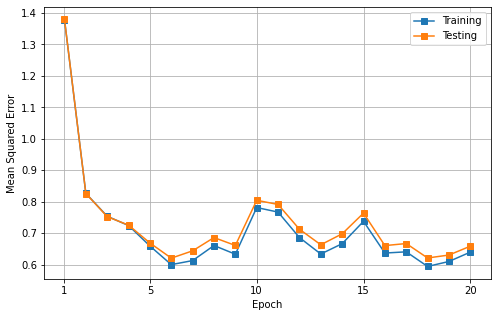

Epoch 1. Training MSE: 1.245, Test MSE: 1.245.
Epoch 2. Training MSE: 0.833, Test MSE: 0.833.
Epoch 3. Training MSE: 0.771, Test MSE: 0.772.
Epoch 4. Training MSE: 0.713, Test MSE: 0.715.


KeyboardInterrupt: 

In [9]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor(X_train,
                                                                           X_test,
                                                                           y_train,
                                                                           y_test,
                                                                           layers,
                                                                           neurons,
                                                                           setting_dict,
                                                                           save_all = True,
                                                                           file_var = "../objects/wine/enkf_wine_full_rand_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                           file_model = "../models/wine/enkf_wine_full_rand_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                           verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_rand_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [ ]:
obj_dict = load_objects("../objects/wine/enkf_wine_full_rand_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [ ]:
final_model = nn_load("../models/wine/enkf_wine_full_rand_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))